In [5]:
import pymongo
import logging
import matplotlib.pyplot as plt
import statistics
import dotenv
import os

from src.metrics.connection_time import connection_time
from src.metrics.latency import latency
from src.metrics.query_execution_time import query_execution_time
from src.metrics.throughput import throughput
from src.metrics.write_performance import write_performance
from src.utils.filter_outliers import filter_outliers
from src.utils.statistical_importance import is_statistically_significant

dotenv.load_dotenv(dotenv_path="resources/secrets.env")

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(message)s",
)

In [6]:
client = pymongo.MongoClient(os.environ["MONGO_URI"])

In [7]:
for name in client.list_database_names():
    print(name)

nieruchomosci
admin
local


### Latency test

In [8]:
avg_latency_1, each_run_latency_1 = latency(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)
avg_latency_2, each_run_latency_2 = latency(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)

2025-12-14 14:21:26,017 - Checking latency...
2025-12-14 14:22:01,905 - Time to fully execute find() 1000 times: 35 ms
2025-12-14 14:22:01,905 - Checking latency...
2025-12-14 14:22:37,583 - Time to fully execute find() 1000 times: 35 ms


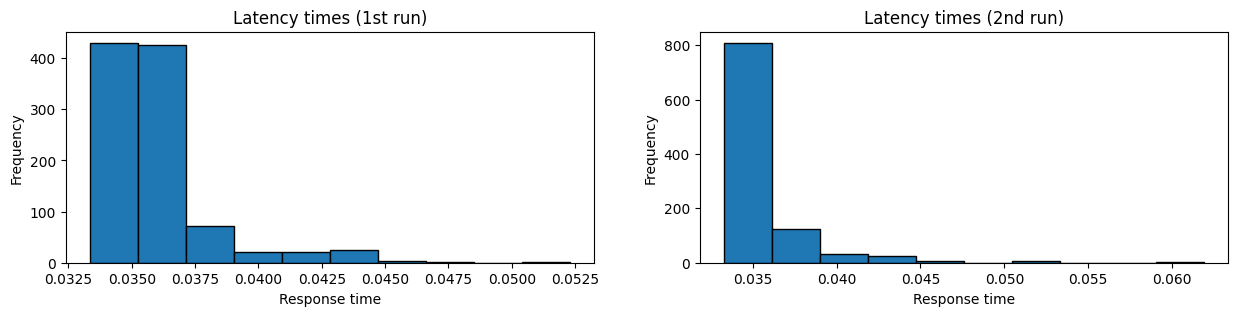

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_latency_1, bins=10, edgecolor="black")
axes[0].set_title("Latency times (1st run)")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_latency_2, bins=10, edgecolor="black")
axes[1].set_title("Latency times (2nd run)")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [10]:
filtered_each_run_latency_1 = filter_outliers(each_run_latency_1)
filtered_each_run_latency_2 = filter_outliers(each_run_latency_2)

In [11]:
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_latency_1) / len(filtered_each_run_latency_1):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_run_latency_1):.6f} sec")
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_latency_2) / len(filtered_each_run_latency_2):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_run_latency_2):.6f} sec")

Executed 1000 queries.
Average time: 0.035319 sec
 Median time: 0.035352 sec
Executed 1000 queries.
Average time: 0.035094 sec
 Median time: 0.034985 sec


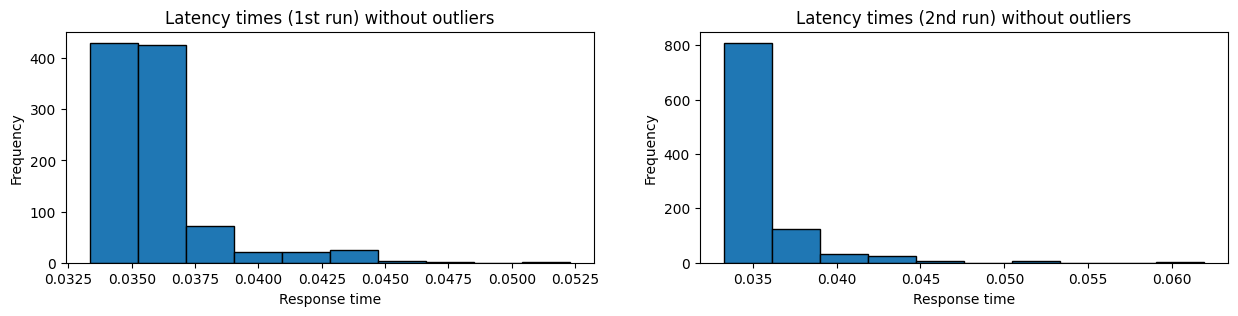

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_latency_1, bins=10, edgecolor="black")
axes[0].set_title("Latency times (1st run) without outliers")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_latency_2, bins=10, edgecolor="black")
axes[1].set_title("Latency times (2nd run) without outliers")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [13]:
is_statistically_significant(
    first_data=filtered_each_run_latency_1, second_data=filtered_each_run_latency_2
)

2025-12-14 14:22:38,113 - Shapiro-Wilk Test for first dataset: p-value = 2.7796142393005077e-16
2025-12-14 14:22:38,113 - Shapiro-Wilk Test for second dataset: p-value = 6.594799479719293e-19
2025-12-14 14:22:38,113 - At least one list is not normally distributed, I perform the Mann-Whitney test.
2025-12-14 14:22:38,115 - Mann-Whitney U Test: p-value = 1.0710774596696783e-05, so...
2025-12-14 14:22:38,115 - Because the p-value is less than the assumed significance level (α=0.05), the difference between the distributions is statistically significant. We can therefore reject the null hypothesis and accept the alternative that the distributions of the two samples differ statistically significantly.


### Query execution time test

In [14]:
each_run_query_execution_time_1 = query_execution_time(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)
each_run_query_execution_time_2 = query_execution_time(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)

2025-12-14 14:22:38,164 - Checking query execution time...
2025-12-14 14:22:38,202 - Query execution time: 0
2025-12-14 14:22:38,239 - Query execution time: 0
2025-12-14 14:22:38,280 - Query execution time: 0
2025-12-14 14:22:38,317 - Query execution time: 0
2025-12-14 14:22:38,355 - Query execution time: 0
2025-12-14 14:22:38,394 - Query execution time: 0
2025-12-14 14:22:38,433 - Query execution time: 0
2025-12-14 14:22:38,473 - Query execution time: 0
2025-12-14 14:22:38,512 - Query execution time: 0
2025-12-14 14:22:38,551 - Query execution time: 0
2025-12-14 14:22:38,590 - Query execution time: 0
2025-12-14 14:22:38,628 - Query execution time: 0
2025-12-14 14:22:38,666 - Query execution time: 0
2025-12-14 14:22:38,704 - Query execution time: 0
2025-12-14 14:22:38,742 - Query execution time: 0
2025-12-14 14:22:38,782 - Query execution time: 0
2025-12-14 14:22:38,820 - Query execution time: 0
2025-12-14 14:22:38,856 - Query execution time: 0
2025-12-14 14:22:38,894 - Query execution

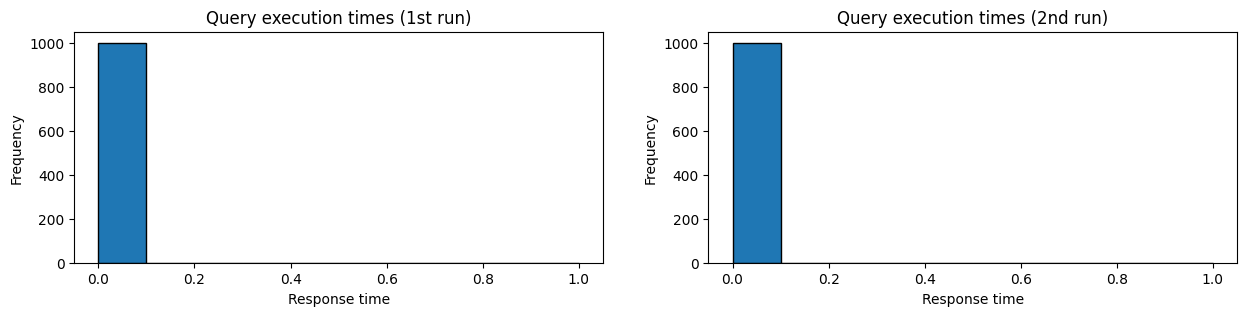

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_query_execution_time_1, bins=10, edgecolor="black")
axes[0].set_title("Query execution times (1st run)")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_query_execution_time_2, bins=10, edgecolor="black")
axes[1].set_title("Query execution times (2nd run)")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [16]:
filtered_each_run_query_execution_time_1 = filter_outliers(
    each_run_query_execution_time_1
)
filtered_each_run_query_execution_time_2 = filter_outliers(
    each_run_query_execution_time_2
)

In [17]:
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_query_execution_time_1) / len(filtered_each_run_query_execution_time_1):.6f} sec"
)
print(
    f" Median time: {statistics.median(filtered_each_run_query_execution_time_1):.6f} sec"
)
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_query_execution_time_2) / len(filtered_each_run_query_execution_time_2):.6f} sec"
)
print(
    f" Median time: {statistics.median(filtered_each_run_query_execution_time_2):.6f} sec"
)

Executed 1000 queries.
Average time: 0.000000 sec
 Median time: 0.000000 sec
Executed 1000 queries.
Average time: 0.000000 sec
 Median time: 0.000000 sec


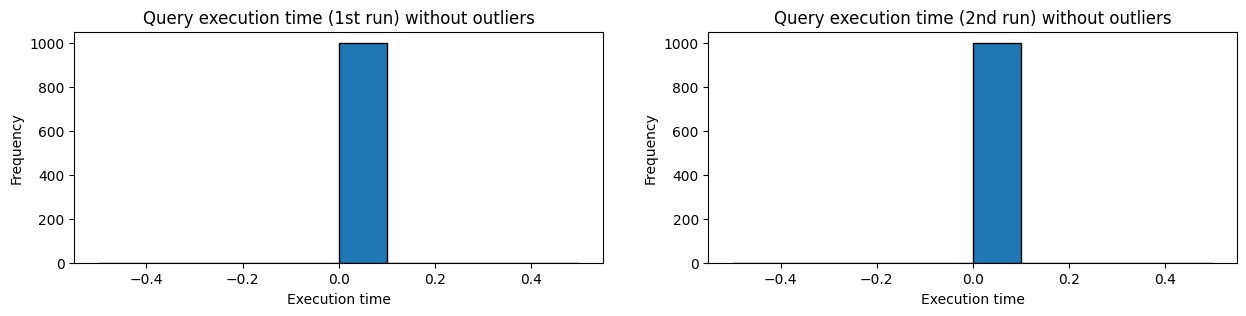

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(filtered_each_run_query_execution_time_1, bins=10, edgecolor="black")
axes[0].set_title("Query execution time (1st run) without outliers")
axes[0].set_xlabel("Execution time")
axes[0].set_ylabel("Frequency")

axes[1].hist(filtered_each_run_query_execution_time_2, bins=10, edgecolor="black")
axes[1].set_title("Query execution time (2nd run) without outliers")
axes[1].set_xlabel("Execution time")
axes[1].set_ylabel("Frequency")
plt.show()

In [19]:
is_statistically_significant(
    first_data=filtered_each_run_query_execution_time_1,
    second_data=filtered_each_run_query_execution_time_2,
)

/home/matiar/Programming/ODZD/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
2025-12-14 14:23:54,705 - Shapiro-Wilk Test for first dataset: p-value = 1.0
2025-12-14 14:23:54,706 - Shapiro-Wilk Test for second dataset: p-value = 1.0
2025-12-14 14:23:54,706 - There is no basis to reject H0 that both lists are normally distributed.
/home/matiar/Programming/ODZD/.venv/lib/python3.13/site-packages/scipy/stats/_morestats.py:3104: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
2025-12-14 14:23:54,708 - Levene's Test: p-value = nan
2025-12-14 14:23:54,708 - Variances are not equal, I am doing t-Welch test.
2025-12-14 14:23:54,710 - T-test: p-value = nan
2025-12-14 14:23:54,710 - Because the p-value is less than the assumed significance level (α=0.05), the difference between the distributions is statisti

### Throughput test

In [20]:
avg_throughput_1, each_run_throughput_1 = throughput(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)
avg_throughput_2, each_run_throughput_2 = throughput(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)

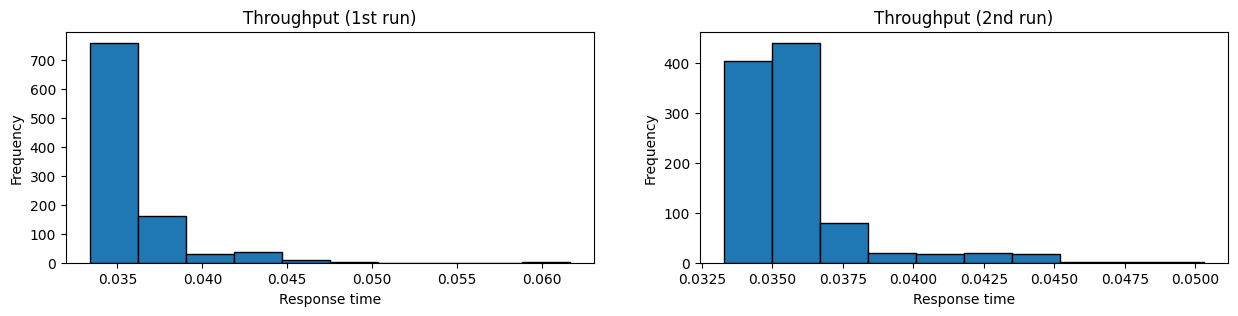

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_throughput_1, bins=10, edgecolor="black")
axes[0].set_title("Throughput (1st run)")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_throughput_2, bins=10, edgecolor="black")
axes[1].set_title("Throughput (2nd run)")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [22]:
filtered_each_run_throughput_1 = filter_outliers(each_run_throughput_1)
filtered_each_run_throughput_2 = filter_outliers(each_run_throughput_2)

In [23]:
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_throughput_1) / len(filtered_each_run_throughput_1):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_run_throughput_1):.6f} sec")
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_throughput_2) / len(filtered_each_run_throughput_2):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_run_throughput_2):.6f} sec")

Executed 1000 queries.
Average time: 0.035306 sec
 Median time: 0.035292 sec
Executed 1000 queries.
Average time: 0.035268 sec
 Median time: 0.035278 sec


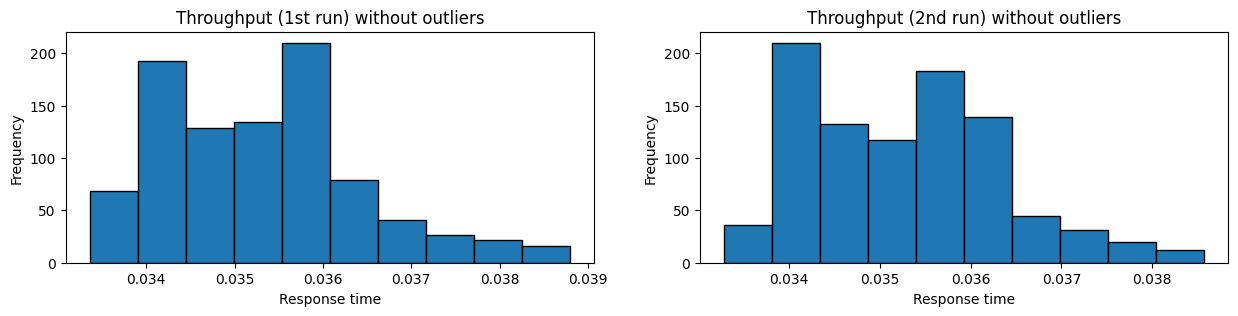

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(filtered_each_run_throughput_1, bins=10, edgecolor="black")
axes[0].set_title("Throughput (1st run) without outliers")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(filtered_each_run_throughput_2, bins=10, edgecolor="black")
axes[1].set_title("Throughput (2nd run) without outliers")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [25]:
is_statistically_significant(
    first_data=filtered_each_run_throughput_1,
    second_data=filtered_each_run_throughput_2,
)

2025-12-14 14:25:06,904 - Shapiro-Wilk Test for first dataset: p-value = 9.108208923974753e-17
2025-12-14 14:25:06,905 - Shapiro-Wilk Test for second dataset: p-value = 1.2841167248903884e-15
2025-12-14 14:25:06,905 - At least one list is not normally distributed, I perform the Mann-Whitney test.
2025-12-14 14:25:06,906 - Mann-Whitney U Test: p-value = 0.8515309211241142, so...
2025-12-14 14:25:06,906 - There is no basis to reject H0 that the difference in distributions is not statistically significant.


### Connection time

In [26]:
avg_connection_time_1, each_run_connection_time_1 = connection_time(
    n=1000,
    client=client,
)
avg_connection_time_2, each_run_connection_time_2 = connection_time(
    n=1000,
    client=client,
)

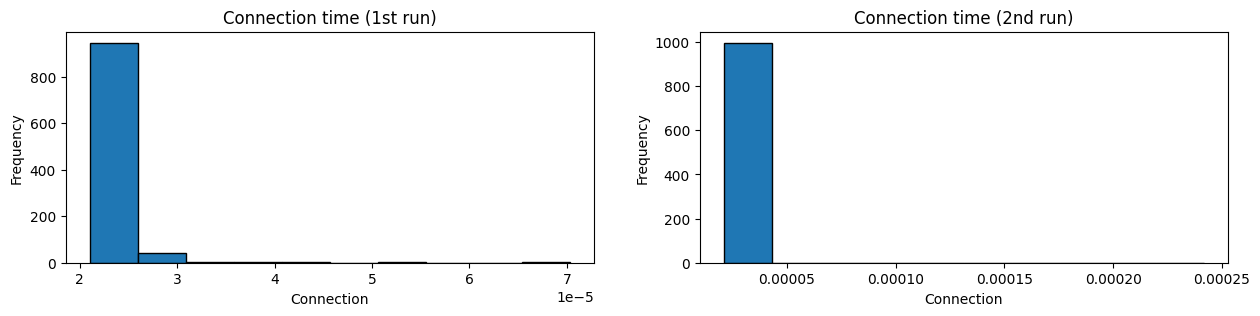

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_connection_time_1, bins=10, edgecolor="black")
axes[0].set_title("Connection time (1st run)")
axes[0].set_xlabel("Connection")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_connection_time_2, bins=10, edgecolor="black")
axes[1].set_title("Connection time (2nd run)")
axes[1].set_xlabel("Connection")
axes[1].set_ylabel("Frequency")
plt.show()

In [28]:
filtered_each_connection_time_1 = filter_outliers(each_run_connection_time_1)
filtered_each_connection_time_2 = filter_outliers(each_run_connection_time_2)

In [29]:
print(
    f"Executed 1000 connections.\nAverage time: {sum(filtered_each_connection_time_1) / len(filtered_each_connection_time_1):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_connection_time_1):.6f} sec")
print(
    f"Executed 1000 connections.\nAverage time: {sum(filtered_each_connection_time_2) / len(filtered_each_connection_time_2):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_connection_time_2):.6f} sec")

Executed 1000 connections.
Average time: 0.000022 sec
 Median time: 0.000022 sec
Executed 1000 connections.
Average time: 0.000022 sec
 Median time: 0.000022 sec


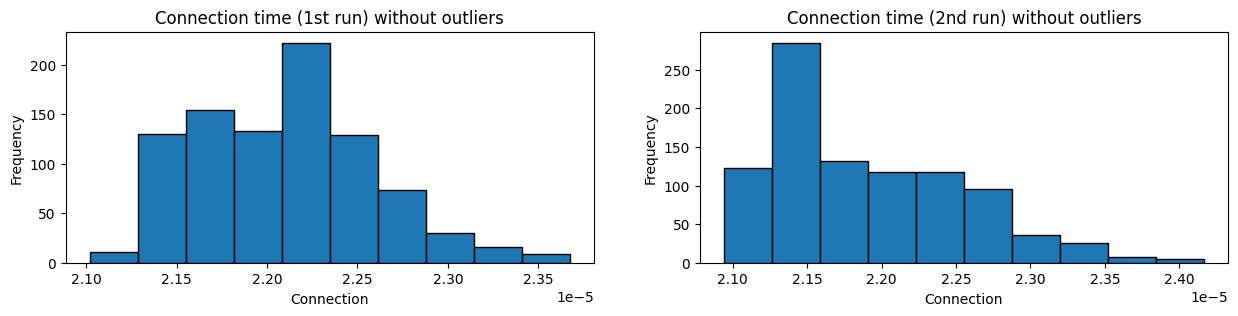

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(filtered_each_connection_time_1, bins=10, edgecolor="black")
axes[0].set_title("Connection time (1st run) without outliers")
axes[0].set_xlabel("Connection")
axes[0].set_ylabel("Frequency")

axes[1].hist(filtered_each_connection_time_2, bins=10, edgecolor="black")
axes[1].set_title("Connection time (2nd run) without outliers")
axes[1].set_xlabel("Connection")
axes[1].set_ylabel("Frequency")
plt.show()

In [31]:
is_statistically_significant(
    first_data=filtered_each_connection_time_1,
    second_data=filtered_each_connection_time_2,
)

2025-12-14 14:25:07,410 - Shapiro-Wilk Test for first dataset: p-value = 4.727231885059493e-10
2025-12-14 14:25:07,411 - Shapiro-Wilk Test for second dataset: p-value = 6.125456076171687e-21
2025-12-14 14:25:07,411 - At least one list is not normally distributed, I perform the Mann-Whitney test.
2025-12-14 14:25:07,413 - Mann-Whitney U Test: p-value = 1.3192068936052318e-19, so...
2025-12-14 14:25:07,413 - Because the p-value is less than the assumed significance level (α=0.05), the difference between the distributions is statistically significant. We can therefore reject the null hypothesis and accept the alternative that the distributions of the two samples differ statistically significantly.


### Write performance

In [32]:
client = pymongo.MongoClient(os.environ["MONGO_URI"])
avg_write_performance_1, each_run_write_performance_1 = write_performance(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)
avg_write_performance_2, each_run_write_performance_2 = write_performance(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)

2025-12-14 14:25:07,617 - Checking write performance for 1000 operations...
2025-12-14 14:25:46,846 - Finished checking write performance...
2025-12-14 14:25:46,847 - Write performance: 25 operations per second...
2025-12-14 14:25:46,848 - Checking write performance for 1000 operations...
2025-12-14 14:26:24,746 - Finished checking write performance...
2025-12-14 14:26:24,746 - Write performance: 26 operations per second...


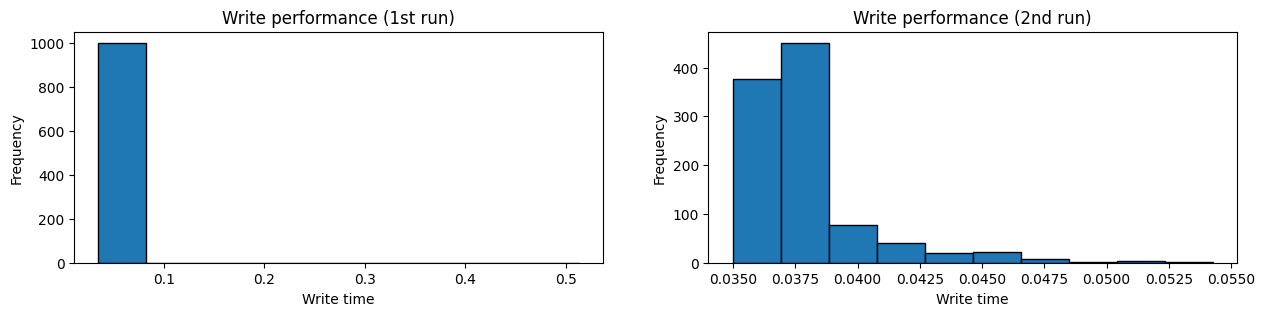

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_write_performance_1, bins=10, edgecolor="black")
axes[0].set_title("Write performance (1st run)")
axes[0].set_xlabel("Write time")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_write_performance_2, bins=10, edgecolor="black")
axes[1].set_title("Write performance (2nd run)")
axes[1].set_xlabel("Write time")
axes[1].set_ylabel("Frequency")
plt.show()

In [34]:
filtered_each_write_performance_1 = filter_outliers(each_run_write_performance_1)
filtered_each_write_performance_2 = filter_outliers(each_run_write_performance_2)

In [35]:
print(
    f"Inserted 1000 rows.\nAverage time: {sum(filtered_each_write_performance_1) / len(filtered_each_write_performance_1):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_write_performance_1):.6f} sec")
print(
    f"Inserted 1000 queries.\nAverage time: {sum(filtered_each_write_performance_2) / len(filtered_each_write_performance_2):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_write_performance_2):.6f} sec")

Inserted 1000 rows.
Average time: 0.037834 sec
 Median time: 0.037673 sec
Inserted 1000 queries.
Average time: 0.037245 sec
 Median time: 0.037122 sec


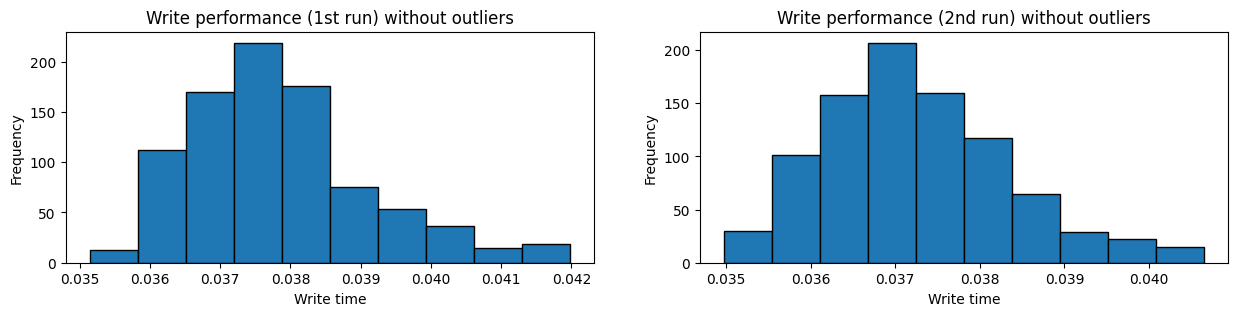

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(filtered_each_write_performance_1, bins=10, edgecolor="black")
axes[0].set_title("Write performance (1st run) without outliers")
axes[0].set_xlabel("Write time")
axes[0].set_ylabel("Frequency")

axes[1].hist(filtered_each_write_performance_2, bins=10, edgecolor="black")
axes[1].set_title("Write performance (2nd run) without outliers")
axes[1].set_xlabel("Write time")
axes[1].set_ylabel("Frequency")
plt.show()

In [37]:
is_statistically_significant(
    first_data=filtered_each_write_performance_1,
    second_data=filtered_each_write_performance_2,
)

2025-12-14 14:26:25,226 - Shapiro-Wilk Test for first dataset: p-value = 7.226546241153221e-17
2025-12-14 14:26:25,226 - Shapiro-Wilk Test for second dataset: p-value = 4.377519032222081e-11
2025-12-14 14:26:25,227 - At least one list is not normally distributed, I perform the Mann-Whitney test.
2025-12-14 14:26:25,228 - Mann-Whitney U Test: p-value = 5.003188410929784e-23, so...
2025-12-14 14:26:25,228 - Because the p-value is less than the assumed significance level (α=0.05), the difference between the distributions is statistically significant. We can therefore reject the null hypothesis and accept the alternative that the distributions of the two samples differ statistically significantly.
